# 7.2. Случайный лес

Ваша задача - написать класс `random_forest` для решения задачи классификации на основе датасета Ирисов Фишера (`sklearn.datasets.load_iris`), принимающий на вход конструктора аргументы `n_estimators`, `max_depth`, `subspaces_dim` и `random_state`. описание этих аргументов приведено ниже. У этого класса должны быть определены методы `.fit()` и `.predict()`, а также поле `._estimators`, в котором должен храниться список алгоритмов, используемых в ансамбле.

- n_estimators - число деревьев в ансамбле
- max_depth - максимальная глубина каждого дерева в ансамбле
- subspaces_dim - размерность случайного подпространства для каждого дерева

Для создания обучающей подвыборки для каждого из базовых классификаторов, Вы можете воспользоваться классом `sample`, который Вы реализовали в прошлом задании. В случае его использования, не забудьте включить его описание в файл с Вашим решением текущего задания. Мы также предлагаем вам организовать выбор подпространств для каждого дерева посредством заполнения списка `subspace_idx`, в котором будут логироваться выбранные для каждого базового классификатора подпространства.

Замечание: в рамках выполнения данного задания запрещено использовать класс `sklearn.ensemble.RandomForestClassifier`. Такой код не пройдёт проверку.

Подберите также гиперпараметры, на которых ваш алгоритм получает наилучшее качество (с точки зрения метрики accuracy, доли правильных ответов) на тестовой выборке с параметром `test_size`=0.3, задайте их в виде глобальных переменных N_ESTIMATORS, MAX_DEPTH, SUBSPACE_DIM.

Шаблон класса:

In [160]:
import numpy as np

class sample(object):
  def __init__(self, X, n_subspace):
    self.idx_subspace = self.random_subspace(X, n_subspace)

  def __call__(self, X, y):
    idx_obj = self.bootstrap_sample(X)
    X_sampled, y_sampled = self.get_subsample(X, y, self.idx_subspace, idx_obj)
    return X_sampled, y_sampled

  @staticmethod
  def bootstrap_sample(X):
    """
    Заполните тело этой функции таким образом, чтобы она возвращала массив индексов выбранных при помощи бэггинга индексов.
    Пользуйтесь только инструментами, реализованными в numpy.random, выставляя везде, где это необходимо, random_state=42
    """
    # np.random.seed(42)
    n_samples = len(X)
    choice = np.random.choice(np.arange(n_samples), size=n_samples, replace=True)
    return np.unique(choice)

  
  @staticmethod
  def random_subspace(X, n_subspace):
    """
    Заполните тело этой функции таким образом, чтобы она возвращала массив индексов выбранных при помощи метода случайных подпространств признаков
    Количество этих признаков передается при помощи аргумента n_subspace
    Пользуйтесь только инструментами, реализованными в numpy.random, выставляя везде, где это необходимо, random_state=42
    """
    # np.random.seed(42)
    n_features = X.shape[1]
    return np.random.choice(np.arange(n_features), size=n_subspace, replace=False)


  @staticmethod
  def get_subsample(X, y, idx_subspace, idx_obj):
    """
    Заполните тело этой функции таким образом, чтобы она возвращала подвыборку x_sampled, y_sampled
    по значениям индексов признаков(idx_subspace) и объектов(idx_obj) , которые должны в неё попасть
    """

    return X[np.ix_(idx_obj, idx_subspace)], y[idx_obj]


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)

N_ESTIMATORS = 10
MAX_DEPTH = 5
SUBSPACE_DIM = 2

class random_forest(object):
  def __init__(self, n_estimators: int, max_depth: int, subspaces_dim: int, random_state: int):
    self.n_estimators = n_estimators
    self.max_depth = max_depth
    self.subspaces_dim = subspaces_dim
    self.random_state = random_state
    self._estimators = []
    self.subspaces_idx = []
    """
      Задайте все необходимые поля в рамках конструктора класса
    """

  def fit(self, X, y):
    for i in range(self.n_estimators):
      """
        Напишите функцию обучения каждого из деревьев алгоритма на собственной подвыборке
      """
      s = sample(X, self.subspaces_dim)
      X_sampled, y_sampled = s(X, y)
      tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_state)
      tree.fit(X_sampled, y_sampled)
      self._estimators.append(tree)
      self.subspaces_idx.append(s.idx_subspace)

  def predict(self, X):
    """
      Напишите функцию получения среднего предсказания алгоритма
    """
    pred = []
    for tree, idx_subspace in zip(self._estimators, self.subspaces_idx):
      pred.append(tree.predict(X[np.ix_(range(len(X)), idx_subspace)]))

    
    pred = np.array(pred).T

    
    return np.array([np.bincount(row).argmax() for row in pred])
      


## Примечания

1. В данной задаче запрещено использовать библиотеку pandas.

2. В реализуемых методах запрещается использовать вывод любой информации на экран (в частности, недопустимо использование print()).

# Пример входных и выходных данных

In [162]:
X = np.array([[ 0.47819456, -1.57891216, -0.1018819 ,  1.11113501,  0.20826281,
        -1.11091227,  0.07844205],
       [ 0.11850997,  1.91073022,  0.95574903,  1.35798262,  0.56177995,
         0.26012021,  0.42404407],
       [-0.52304666,  0.75051167, -1.037804  , -0.10105312,  0.08559063,
         0.5102743 , -1.79068927],
       [-0.09078024,  1.62097709,  0.93284371,  1.0386902 , -0.68354252,
        -1.27138661,  0.15060651],
       [ 0.11676701, -0.71769062, -0.80119565,  0.73448495,  1.80728052,
         0.45770337,  0.20689119]])
print(X)
print(X.shape)
y = np.array([ 1, 0, 1, 1, 0])
print(y.shape)

[[ 0.47819456 -1.57891216 -0.1018819   1.11113501  0.20826281 -1.11091227
   0.07844205]
 [ 0.11850997  1.91073022  0.95574903  1.35798262  0.56177995  0.26012021
   0.42404407]
 [-0.52304666  0.75051167 -1.037804   -0.10105312  0.08559063  0.5102743
  -1.79068927]
 [-0.09078024  1.62097709  0.93284371  1.0386902  -0.68354252 -1.27138661
   0.15060651]
 [ 0.11676701 -0.71769062 -0.80119565  0.73448495  1.80728052  0.45770337
   0.20689119]]
(5, 7)
(5,)


In [163]:
X

array([[ 0.47819456, -1.57891216, -0.1018819 ,  1.11113501,  0.20826281,
        -1.11091227,  0.07844205],
       [ 0.11850997,  1.91073022,  0.95574903,  1.35798262,  0.56177995,
         0.26012021,  0.42404407],
       [-0.52304666,  0.75051167, -1.037804  , -0.10105312,  0.08559063,
         0.5102743 , -1.79068927],
       [-0.09078024,  1.62097709,  0.93284371,  1.0386902 , -0.68354252,
        -1.27138661,  0.15060651],
       [ 0.11676701, -0.71769062, -0.80119565,  0.73448495,  1.80728052,
         0.45770337,  0.20689119]])

In [164]:
X.shape

(5, 7)

In [165]:
y.shape

(5,)

In [166]:
rf = random_forest(25, 15, 2, 42)
rf.fit(X, y)

In [167]:
preds = rf.predict(X)

In [168]:
preds

array([1, 0, 1, 1, 0])

In [169]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [170]:
clf = random_forest(10, 5, 2, 42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
score = accuracy_score(y_test, pred)
print(score)

1.0


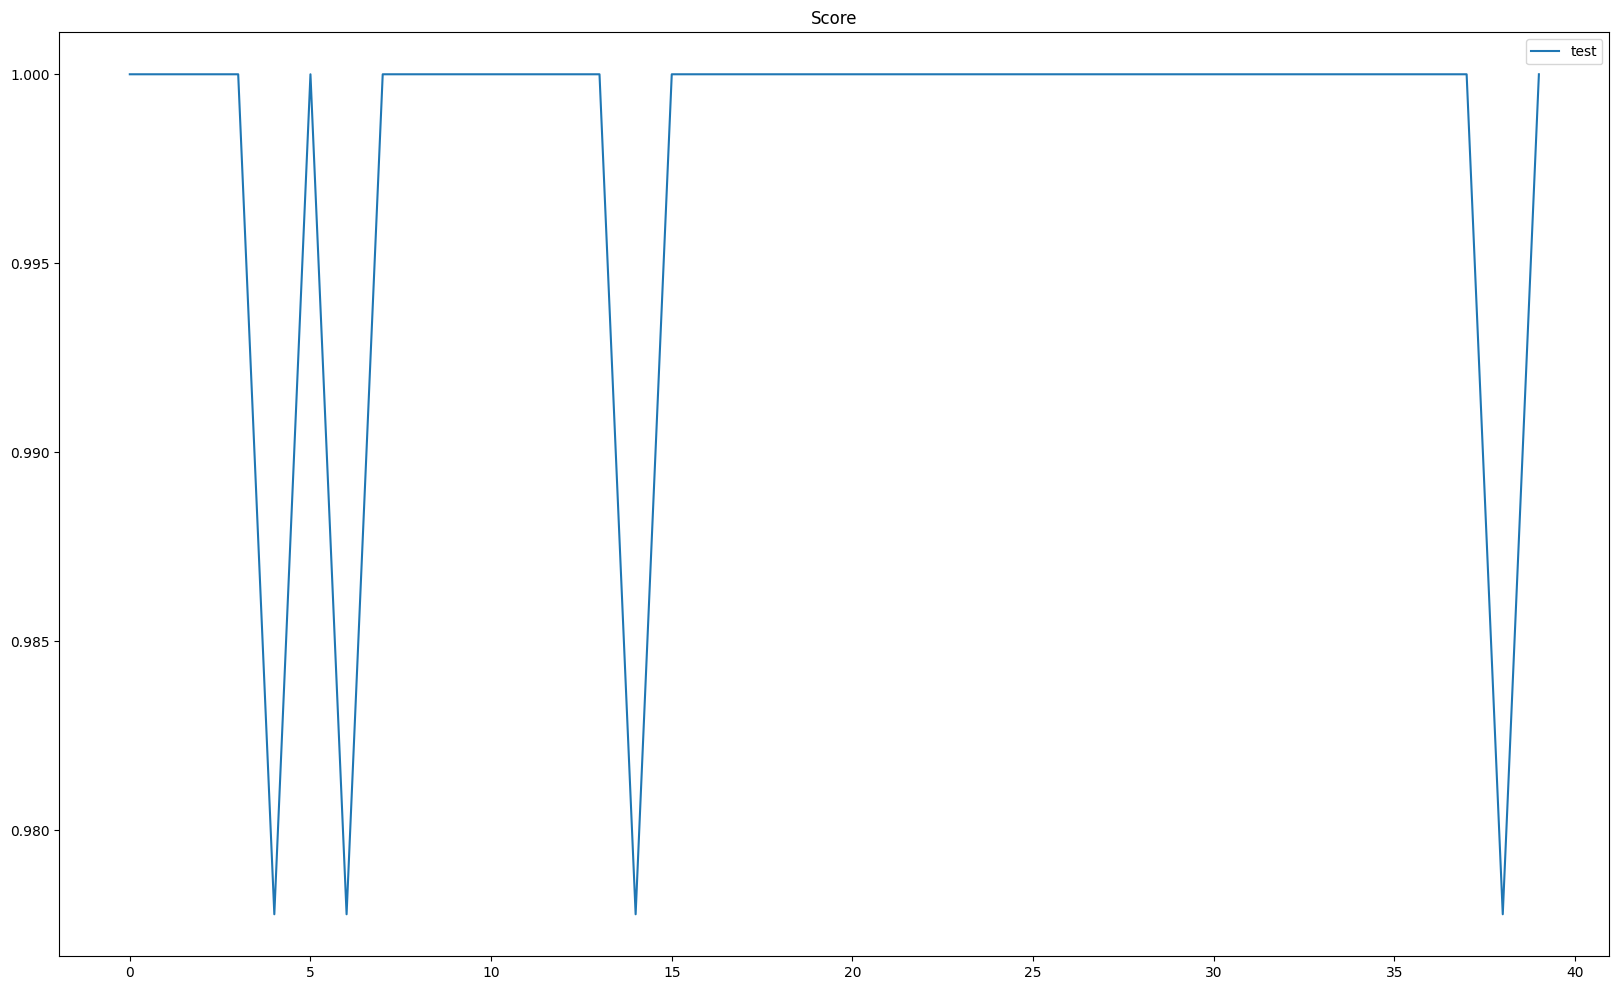

In [171]:
scores = []
for i in range(40):
    clf = random_forest(25, 15, 2, 42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, pred))

plt.figure(figsize=(20, 12))
plt.title("Score")

plt.plot(scores, label="test")

plt.legend()

